<a href="https://colab.research.google.com/github/insancs/Android_Covid19Stats/blob/master/weather_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
    
# Read the dataset
weather2010 = pd.read_csv('sample_data/NOAA dataset 2010.csv', sep=';')
weather2011 = pd.read_csv('sample_data/NOAA dataset 2011.csv', sep=';')

# Print head of data
print("Data 2010\n", weather2010.head())
print("Data 2011\n", weather2011.head())

Data 2010
    Temperature  DewPoint  Pressure            Date
0         46.2      37.5       1.0  20100101 00:00
1         44.6      37.1       1.0  20100101 01:00
2         44.1      36.9       1.0  20100101 02:00
3         43.8      36.9       1.0  20100101 03:00
4         43.5      36.8       1.0  20100101 04:00
Data 2011
    13904  20110101   53  12  OVC045     ...  AA  .21  .22  .23 29.95.1  .24
0  13904  20110101  153  12  OVC049     ...  AA                  30.02     
1  13904  20110101  253  12  OVC060     ...  AA                  30.02     
2  13904  20110101  353  12  OVC065     ...  AA                  30.04     
3  13904  20110101  453  12  BKN070     ...  AA                  30.04     
4  13904  20110101  553  12  BKN065     ...  AA                  30.06     

[5 rows x 44 columns]


In [9]:
# Change data type column Date in weather2010 to datetime
weather2010['Date'] = pd.to_datetime(weather2010['Date'])

weather2010 = weather2010.set_index('Date')
print(weather2010.head())

                     Temperature  DewPoint  Pressure
Date                                                
2010-01-01 00:00:00         46.2      37.5       1.0
2010-01-01 01:00:00         44.6      37.1       1.0
2010-01-01 02:00:00         44.1      36.9       1.0
2010-01-01 03:00:00         43.8      36.9       1.0
2010-01-01 04:00:00         43.5      36.8       1.0


In [10]:
column_labels = 'Wban,date,Time,StationType,sky_condition,sky_conditionFlag,visibility,visibilityFlag,wx_and_obst_to_vision,wx_and_obst_to_visionFlag,dry_bulb_faren,dry_bulb_farenFlag,dry_bulb_cel,dry_bulb_celFlag,wet_bulb_faren,wet_bulb_farenFlag,wet_bulb_cel,wet_bulb_celFlag,dew_point_faren,dew_point_farenFlag,dew_point_cel,dew_point_celFlag,relative_humidity,relative_humidityFlag,wind_speed,wind_speedFlag,wind_direction,wind_directionFlag,value_for_wind_character,value_for_wind_characterFlag,station_pressure,station_pressureFlag,pressure_tendency,pressure_tendencyFlag,presschange,presschangeFlag,sea_level_pressure,sea_level_pressureFlag,record_type,hourly_precip,hourly_precipFlag,altimeter,altimeterFlag,junk'

# Convert the comma separated string in column_labels to list column_labels_list
column_labels_list = column_labels.split(',')

# Reassign df.columns using the list of strings
weather2011.columns = column_labels_list

# Create list of columns to drop
list_to_drop = ['sky_conditionFlag', 'visibilityFlag', 'wx_and_obst_to_vision', 'wx_and_obst_to_visionFlag',
                'dry_bulb_farenFlag', 'dry_bulb_celFlag', 'wet_bulb_farenFlag', 'wet_bulb_celFlag',
                'dew_point_farenFlag', 'dew_point_celFlag', 'relative_humidityFlag',
                'wind_speedFlag', 'wind_directionFlag', 'value_for_wind_character', 'value_for_wind_characterFlag',
                'station_pressureFlag', 'pressure_tendencyFlag', 'pressure_tendency', 'presschange', 'presschangeFlag',
                'sea_level_pressureFlag', 'hourly_precip', 'hourly_precipFlag', 'altimeter', 'record_type',
                'altimeterFlag', 'junk']

# Drop columns name and assigh result to sunlight_dropped
weather2011_dropped = weather2011.drop(list_to_drop, axis='columns')

print(weather2011_dropped.head())
print(weather2011_dropped.info())

    Wban      date  Time  ...  wind_direction station_pressure sea_level_pressure
0  13904  20110101   153  ...             340            29.49              30.01
1  13904  20110101   253  ...              10            29.49              30.01
2  13904  20110101   353  ...             350            29.51              30.03
3  13904  20110101   453  ...              20            29.51              30.04
4  13904  20110101   553  ...              10            29.53              30.06

[5 rows x 17 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10336 entries, 0 to 10335
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Wban                10336 non-null  int64 
 1   date                10336 non-null  int64 
 2   Time                10336 non-null  int64 
 3   StationType         10336 non-null  int64 
 4   sky_condition       10336 non-null  object
 5   visibility          10324 non-null 

In [11]:
# Convert the date column to string: df_dropped['date']
weather2011_dropped['date'] = weather2011_dropped['date'].astype(str)

# Pad leading zeros to the Time column: df_dropped['Time']
weather2011_dropped['Time'] = weather2011_dropped['Time'].apply(lambda x: '{:0>4}'.format(x))

# Concatenate the new date and Time columns: date_string
date_string = weather2011_dropped['date'] + weather2011_dropped['Time']

# Convert the date_string Series to datetime: date_times
date_times = pd.to_datetime(date_string, format='%Y%m%d%H%M')

# Set the index to be the new date_times container: df_clean
weather2011_clean = weather2011_dropped.set_index(date_times)

# Print the output of df_clean.head()
print(weather2011_clean.head())

                      Wban      date  ... station_pressure  sea_level_pressure
2011-01-01 01:53:00  13904  20110101  ...            29.49               30.01
2011-01-01 02:53:00  13904  20110101  ...            29.49               30.01
2011-01-01 03:53:00  13904  20110101  ...            29.51               30.03
2011-01-01 04:53:00  13904  20110101  ...            29.51               30.04
2011-01-01 05:53:00  13904  20110101  ...            29.53               30.06

[5 rows x 17 columns]


In [12]:
# Print the dry_bulb_faren temperature between 8 AM and 9 AM on June 20, 2011
print(weather2011_clean.loc['2011-06-20 08:00:00':'2011-06-20 09:00:00', 'dry_bulb_faren'])

2011-06-20 08:27:00     M
2011-06-20 08:28:00     M
2011-06-20 08:29:00     M
2011-06-20 08:30:00     M
2011-06-20 08:31:00     M
2011-06-20 08:32:00     M
2011-06-20 08:33:00     M
2011-06-20 08:34:00     M
2011-06-20 08:35:00     M
2011-06-20 08:53:00    83
Name: dry_bulb_faren, dtype: object


In [13]:
# Convert the dry_bulb_faren column to numeric values: df_clean['dry_bulb_faren']
weather2011_clean['dry_bulb_faren'] = pd.to_numeric(weather2011_clean['dry_bulb_faren'], errors='coerce')

# Convert the wind_speed and dew_point_faren columns to numeric values
weather2011_clean['wind_speed'] = pd.to_numeric(weather2011_clean['wind_speed'], errors='coerce')
weather2011_clean['dew_point_faren'] = pd.to_numeric(weather2011_clean['dew_point_faren'], errors='coerce')

print(weather2011_clean.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10336 entries, 2011-01-01 01:53:00 to 2011-12-31 23:53:00
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Wban                10336 non-null  int64  
 1   date                10336 non-null  object 
 2   Time                10336 non-null  object 
 3   StationType         10336 non-null  int64  
 4   sky_condition       10336 non-null  object 
 5   visibility          10324 non-null  object 
 6   dry_bulb_faren      10325 non-null  float64
 7   dry_bulb_cel        10336 non-null  object 
 8   wet_bulb_faren      10336 non-null  object 
 9   wet_bulb_cel        10336 non-null  object 
 10  dew_point_faren     10322 non-null  float64
 11  dew_point_cel       10336 non-null  object 
 12  relative_humidity   10336 non-null  object 
 13  wind_speed          10317 non-null  float64
 14  wind_direction      10336 non-null  object 
 15  station_pressure  

In [14]:
# Print the median of the dry_bulb_faren column
print(weather2011_clean['dry_bulb_faren'].median())

# Print the median of the dry_bulb_faren column for the time range '2011-Apr':'2011-Jun'
print(weather2011_clean.loc['2011-Apr':'2011-Jun', 'dry_bulb_faren'].median())

# Print the median of the dry_bulb_faren column for the month of January
print(weather2011_clean.loc['2011-Jan', 'dry_bulb_faren'].median())

72.0
78.0
48.0


In [15]:
# Downsample df_clean by day and aggregate by mean: daily_mean_2011
daily_mean_2011 = weather2011_clean.resample('D').mean()

# Extract the dry_bulb_faren column from daily_mean_2011 using .values: daily_temp_2011
daily_temp_2011 = daily_mean_2011['dry_bulb_faren'].values

# Downsample df_climate by day and aggregate by mean: daily_climate
daily_weather2010 = weather2010.resample('D').mean()

# Extract the Temperature column from daily_climate using .reset_index(): daily_temp_climate
daily_temp_weather2010 = daily_weather2010.reset_index()['Temperature']

# Compute the difference between the two arrays and print the mean difference
difference = daily_temp_2011 - daily_temp_weather2010
print(difference.mean())

1.330083921569873


In [27]:
# Using df_clean, when is sky_condition 'CLR'?
is_sky_clear = weather2011_clean['sky_condition']=='CLR'

# Filter df_clean when is sky_condition 'CLR'
sunny = weather2011_clean[is_sky_clear]

# Resample sunny by day then calculate the max
sunny_daily_max = sunny.resample('D').sum()

# See the result
print(sunny_daily_max.head())

              Wban  StationType  dry_bulb_faren  dew_point_faren  wind_speed
2011-01-01  152944          132           529.0            277.0       108.0
2011-01-02   97328           84           205.0            147.0        37.0
2011-01-03   41712           36            93.0             75.0         0.0
2011-01-04       0            0             0.0              0.0         0.0
2011-01-05   13904           12            35.0             29.0         0.0


In [28]:
# Using df_clean, when does sky_condition contain 'OVC'?
is_sky_overcast = weather2011_clean['sky_condition'].str.contains('OVC')

# Filter df_clean using is_sky_overcast
overcast = weather2011_clean[is_sky_overcast]

# Resample overcast by day then calculate the max
overcast_daily_max = overcast.resample('D').sum()

# See the result
print(overcast_daily_max)

              Wban  StationType  dry_bulb_faren  dew_point_faren  wind_speed
2011-01-01   41712           36           152.0             44.0        32.0
2011-01-02       0            0             0.0              0.0         0.0
2011-01-03  250272          216           939.0            711.0        62.0
2011-01-04  570064          492          2243.0           2139.0       123.0
2011-01-05  152944          132           626.0            608.0         6.0
...            ...          ...             ...              ...         ...
2011-12-24  431024          372          1341.0           1279.0       424.0
2011-12-25  472736          408          1504.0           1385.0       329.0
2011-12-26  194656          168           634.0            562.0        54.0
2011-12-27       0            0             0.0              0.0         0.0
2011-12-28   13904           12            54.0             38.0         9.0

[362 rows x 5 columns]


In [29]:
# Calculate the mean of sunny_daily_max
sunny_daily_max_mean = sunny_daily_max.mean()

# Calculate the mean of overcast_daily_max
overcast_daily_max_mean = overcast_daily_max.mean()

# Print the difference (sunny minus overcast)
print(sunny_daily_max_mean - overcast_daily_max_mean)

Wban              -16412.360312
StationType          -14.164868
dry_bulb_faren       -48.870900
dew_point_faren     -111.075403
wind_speed           -32.636154
dtype: float64


                dry_bulb_faren
dry_bulb_faren             1.0


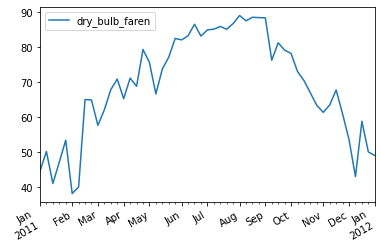

In [30]:
# Select the visibility and dry_bulb_faren columns and resample them: weekly_mean
weekly_mean = weather2011_clean[['visibility', 'dry_bulb_faren']].resample('W').mean()

# Print the output of weekly_mean.corr()
print(weekly_mean.corr())

# Plot weekly_mean with subplots=True
weekly_mean.plot(subplots=True)
plt.show()

In [31]:
# Using df_clean, when is sky_condition 'CLR'?
is_sky_clear = weather2011_clean['sky_condition'] == 'CLR'

# Resample is_sky_clear by day
resampled = is_sky_clear.resample('D')

# See the result
print(resampled)

DatetimeIndexResampler [freq=<Day>, axis=0, closed=left, label=left, convention=start, origin=start_day]


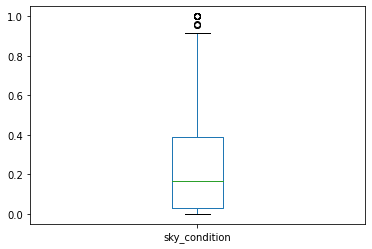

In [32]:
# Calculate the number of sunny hours per day
sunny_hours = resampled.sum()

# Calculate the number of measured hours per day
total_hours = resampled.count()

# Calculate the fraction of hours per day that were sunny
sunny_fraction = sunny_hours / total_hours

# Make a box plot of sunny_fraction
sunny_fraction.plot(kind='box')
plt.show()

            dew_point_faren  dry_bulb_faren
2011-01-31             63.0            80.0
2011-02-28             70.0            85.0
2011-03-31             68.0            87.0
2011-04-30             73.0            93.0
2011-05-31             76.0           100.0
2011-06-30             75.0           104.0
2011-07-31             76.0           102.0
2011-08-31             76.0           110.0
2011-09-30             75.0           102.0
2011-10-31             72.0            93.0
2011-11-30             73.0            93.0
2011-12-31             70.0            77.0


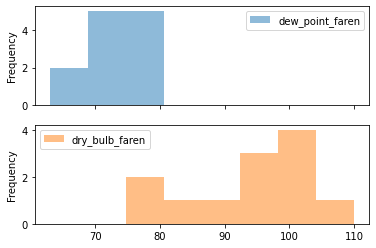

In [33]:
# Resample dew_point_faren and dry_bulb_faren by Month, aggregating the maximum values: monthly_max
monthly_max = weather2011_clean[['dew_point_faren', 'dry_bulb_faren']].resample('M').max()
print(monthly_max)

# Generate a histogram with bins=8, alpha=0.5, subplots=True
monthly_max.plot(kind='hist', bins=8, alpha=0.5, subplots=True)

# Show the plot
plt.show()

95.3


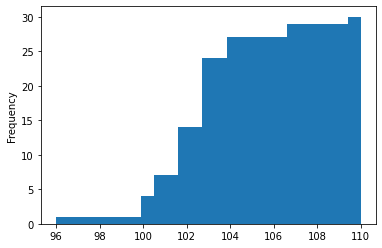

In [34]:
# Extract the maximum temperature in August 2010 from df_climate: august_max
august_max = weather2010.loc['2010-Aug', 'Temperature'].max()
print(august_max)

# Resample August 2011 temps in df_clean by day & aggregate the max value: august_2011
august_2011 = weather2011_clean.loc['2011-Aug', 'dry_bulb_faren'].resample('D').max()

# Filter for days in august_2011 where the value exceeds august_max: august_2011_high
august_2011_high = august_2011.loc[august_2011 > august_max]

# Construct a CDF of august_2011_high
august_2011_high.plot(kind='hist', bins=25, cumulative=True)

# Display the plot
plt.show()